# Aim

1. This notebook is aimed towards generating new features 
1. and reducing set of features

In [1]:
# 4. Feature Engineering and feature reduction (use a max of 6 raw/derived features)

import json
import os
import random
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None

with open("../data/feature-meta/cleaned/meta.json") as f:
    feature_meta = json.load(f)

feature_meta

{'customerID': {'is_raw': True, 'type': 'ID'},
 'gender': {'is_raw': True, 'var_type': 'boolean', 'value_type': 'text'},
 'SeniorCitizen': {'is_raw': True,
  'var_type': 'boolean',
  'value_type': 'numeric'},
 'Partner': {'is_raw': True, 'var_type': 'boolean', 'value_type': 'text'},
 'Dependents': {'is_raw': True, 'var_type': 'boolean', 'value_type': 'text'},
 'tenure': {'is_raw': True, 'var_type': 'real', 'value_type': 'numeric'},
 'PhoneService': {'is_raw': True, 'var_type': 'boolean', 'value_type': 'text'},
 'MultipleLines': {'is_raw': True,
  'var_type': 'categorical',
  'value_type': 'text'},
 'InternetService': {'is_raw': True,
  'var_type': 'categorical',
  'value_type': 'text'},
 'OnlineSecurity': {'is_raw': True,
  'var_type': 'categorical',
  'value_type': 'text'},
 'OnlineBackup': {'is_raw': True,
  'var_type': 'categorical',
  'value_type': 'text'},
 'DeviceProtection': {'is_raw': True,
  'var_type': 'categorical',
  'value_type': 'text'},
 'TechSupport': {'is_raw': True,
 

In [2]:
df = pd.read_parquet("../data/cleaned/telcom-churn-rm-corr.parquet")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Generating random dates in between 1/3/2021 and 30/8/2021

In [3]:
year = 2021

month_low, month_high = 3, 8
day_low, day_high = 1, 30

date_low = pd.to_datetime(f"{day_low}-{month_low}-{year}", dayfirst=True)
date_high = pd.to_datetime(f"{day_high}-{month_high}-{year}", dayfirst=True)

date_low, date_high

(Timestamp('2021-03-01 00:00:00'), Timestamp('2021-08-30 00:00:00'))

In [4]:
date_list = []
date_pointer = date_low

max_sample_len = 1_00_000

np.random.seed(10784)
while len(date_list) < max_sample_len:
    random_day = np.random.randint(25, 100)
    random_hour = np.random.randint(20, 24)
    random_minute = np.random.randint(0, 60)
    random_second = np.random.randint(0, 60)

    date_pointer = date_low + timedelta(
        days=random_day, hours=random_hour, minutes=random_minute, seconds=random_second
    )
    date_list.append(date_pointer)


random.seed(9987)
df["timestamp"] = random.sample(date_list, len(df))

In [5]:
df = df.sort_values(by="timestamp", ascending=True, ignore_index=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,timestamp
0,4238-JSSWH,Female,1,Yes,No,35,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Month-to-month,No,Bank transfer (automatic),102.05,3452.55,No,2021-03-26 20:00:15
1,0839-JTCUD,Female,0,Yes,Yes,66,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.90,5958.85,No,2021-03-26 20:07:48
2,8128-YVJRG,Female,0,No,No,7,Yes,Yes,Fiber optic,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,79.65,604.70,Yes,2021-03-26 20:08:14
3,5949-HGVJL,Female,0,Yes,No,26,Yes,No,DSL,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,73.05,1959.50,No,2021-03-26 20:09:01
4,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Month-to-month,Yes,Electronic check,103.00,4414.30,Yes,2021-03-26 20:10:20


In [6]:
df.to_parquet("../data/cleaned/telcom-churn-add-date.parquet")

In [7]:
df = pd.read_parquet("../data/cleaned/telcom-churn-add-date.parquet")

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns=["Churn", "tenure"]),
    df[["tenure", "Churn"]],
    test_size=0.2,
    shuffle=False,
)

## Transform labels

In [9]:
def transform_train_test_labels(y_train, y_test):

    y_train["Churn"] = y_train["Churn"].map({"Yes": 1, "No": 0})
    y_test["Churn"] = y_test["Churn"].map({"Yes": 1, "No": 0})

    return y_train, y_test


y_train, y_test = transform_train_test_labels(y_train, y_test)

## Get features

In [10]:
import category_encoders as ce


def transform_train_test_columns(x_train, x_test, feature_meta):

    mapping_dict = dict()
    for feature in x_train.columns.tolist():
        var_type = feature_meta.get(feature, dict()).get("var_type", -1)

        if var_type == "boolean":
            t = sorted(x_train[feature].unique())
            t = {i: j for i, j in zip(t, [0, 1])}

            x_train[feature] = x_train[feature].map(t)
            x_test[feature] = x_test[feature].map(t)

            mapping_dict[feature] = t

        # as there are very less categories per feature
        # using binary encoder
        # Would require modification if number of distinct categories are very high
        if var_type == "categorical":
            index_values = x_train[feature].drop_duplicates().values.tolist()

            enc = ce.BinaryEncoder()

            # get values for train
            t_train = enc.fit_transform(x_train[feature])
            x_train[feature] = t_train.values.tolist()

            # get values for test
            t_test = enc.transform(x_test[feature])
            x_test[feature] = t_test.values.tolist()
            mapping_dict[feature] = {
                "is_vector": True,
                "enc_model_params": enc.get_params(),
                "enc_model_values": index_values,
            }

    return x_train, x_test, mapping_dict


x_train, x_test, mapping_dict = transform_train_test_columns(
    x_train, x_test, feature_meta=feature_meta
)

In [11]:
x_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,timestamp
0,4238-JSSWH,0,1,1,0,1,"[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]",0,"[0, 0, 1]",102.05,3452.55,2021-03-26 20:00:15
1,0839-JTCUD,0,0,1,1,1,"[0, 1]","[1, 0]","[1, 0]","[1, 0]","[0, 1]","[1, 0]","[0, 1]","[1, 0]",0,"[0, 1, 0]",89.90,5958.85,2021-03-26 20:07:48
2,8128-YVJRG,0,0,0,0,1,"[0, 1]","[0, 1]","[1, 0]","[0, 1]","[1, 0]","[0, 1]","[1, 0]","[0, 1]",1,"[0, 1, 1]",79.65,604.70,2021-03-26 20:08:14
3,5949-HGVJL,0,0,1,0,1,"[1, 0]","[1, 0]","[0, 1]","[1, 0]","[1, 0]","[1, 0]","[0, 1]","[0, 1]",1,"[1, 0, 0]",73.05,1959.50,2021-03-26 20:09:01
4,7142-HVGBG,1,1,1,0,1,"[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[0, 1]",1,"[1, 0, 0]",103.00,4414.30,2021-03-26 20:10:20


## Get cyclical time features

eg. `sin_hour = sin(hour*(2*pi/24))` # hours have a cycle of 24

[reference](http://blog.davidkaleko.com/feature-engineering-cyclical-features.html#:~:text=Hours%20of%20the%20day%2C%20days,each%20other%20and%20not%20far.)

Understanding Cyclical time features

Let us use `sin_hour = sin((hour/24)*(2*pi))` for tracing an example.




**Let `r = hour/24`**
1. What are the values that `r` can take?
1. r = {0/24, 1/24, ..... 23/24, 24/24}
1. r = {0, 0.041, ..... , 0.95, 1}
1. r has range of [0,1]


`sin(2*pi)` = `sin(360 degrees)`
1. we will be multiplying `r` with `2*pi`
1. essentially we are calculating what fraction of `2*pi` are we looking at


In [12]:
def encode_timestamp(df_input, column, time_interval):

    if time_interval == "hour":
        max_val = 23
    if time_interval == "day":
        max_val = 365
    if time_interval == "month":
        max_val = 12

    df_input[f"sin_{column}"] = np.sin(2 * np.pi * df_input[column] / max_val)
    df_input[f"cos_{column}"] = np.cos(2 * np.pi * df_input[column] / max_val)

    return df_input


def featurize_timestamp(df_input, column, drop=True):
    df_input["hour"] = df_input[column].dt.hour
    df_input["day"] = df_input[column].dt.day
    df_input["month"] = df_input[column].dt.month

    df_input = encode_timestamp(df_input, column="hour", time_interval="hour")
    df_input = encode_timestamp(df_input, column="day", time_interval="day")
    df_input = encode_timestamp(df_input, column="month", time_interval="month")

    if drop == True:
        df_input = df_input.drop(columns=[column, "hour", "month", "day"])

    return df_input


x_train = featurize_timestamp(df_input=x_train, column="timestamp")
x_test = featurize_timestamp(df_input=x_test, column="timestamp")

In [13]:
print(x_train.columns)
print(x_test.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'sin_hour', 'cos_hour', 'sin_day', 'cos_day',
       'sin_month', 'cos_month'],
      dtype='object')
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'sin_hour', 'cos_hour', 'sin_day', 'cos_day',
       'sin_month', 'cos_month'],
      dtype='object')


let us visualise one of the cyclical time features

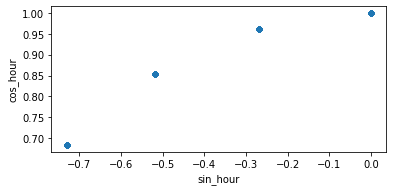

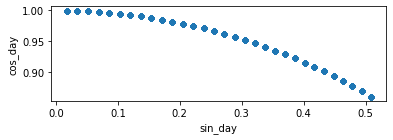

In [14]:
ax = x_train.plot.scatter("sin_hour", "cos_hour").set_aspect("equal")
ax = x_train.plot.scatter("sin_day", "cos_day").set_aspect("equal")

## Flatten vector columns

In [15]:
def prepare_vector_columns_for_model(X, vector_column):

    cols = [f"{vector_column}_{i}" for i in range(len(X[vector_column].iloc[0]))]
    df_vec = pd.DataFrame(X[vector_column].tolist(), columns=cols)

    df_vec.index = X.index
    # print(X.index)
    # print(df_vec.index)
    df_final = pd.concat([df_vec, X], axis=1).drop(columns=vector_column)
    return df_final


for feature in [
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "Contract",
    "PaymentMethod",
]:

    x_train = prepare_vector_columns_for_model(x_train, vector_column=feature)
    x_test = prepare_vector_columns_for_model(x_test, vector_column=feature)

In [16]:
x_train.head().columns

Index(['PaymentMethod_0', 'PaymentMethod_1', 'PaymentMethod_2', 'Contract_0',
       'Contract_1', 'StreamingTV_0', 'StreamingTV_1', 'TechSupport_0',
       'TechSupport_1', 'DeviceProtection_0', 'DeviceProtection_1',
       'OnlineBackup_0', 'OnlineBackup_1', 'OnlineSecurity_0',
       'OnlineSecurity_1', 'InternetService_0', 'InternetService_1',
       'MultipleLines_0', 'MultipleLines_1', 'customerID', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'sin_hour',
       'cos_hour', 'sin_day', 'cos_day', 'sin_month', 'cos_month'],
      dtype='object')

In [17]:
x_test.head().columns

Index(['PaymentMethod_0', 'PaymentMethod_1', 'PaymentMethod_2', 'Contract_0',
       'Contract_1', 'StreamingTV_0', 'StreamingTV_1', 'TechSupport_0',
       'TechSupport_1', 'DeviceProtection_0', 'DeviceProtection_1',
       'OnlineBackup_0', 'OnlineBackup_1', 'OnlineSecurity_0',
       'OnlineSecurity_1', 'InternetService_0', 'InternetService_1',
       'MultipleLines_0', 'MultipleLines_1', 'customerID', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'sin_hour',
       'cos_hour', 'sin_day', 'cos_day', 'sin_month', 'cos_month'],
      dtype='object')

# Scaling real valued features

In [18]:
from sklearn.preprocessing import MinMaxScaler


def min_max_scaling_features(x_train, x_test, feature_meta):
    scaling_dict = {}
    for feature in x_train.columns.tolist():
        var_type = feature_meta.get(feature, dict()).get("var_type", -1)
        if var_type == "real":
            scaler = MinMaxScaler()
            x_train[feature] = scaler.fit_transform(
                np.reshape(x_train[feature].values, (-1, 1))
            )
            x_test[feature] = scaler.transform(
                np.reshape(x_test[feature].values, (-1, 1))
            )

            scaling_dict[feature] = {"min": scaler.min_[0], "scale": scaler.scale_[0]}
    return x_train, x_test, scaling_dict


x_train, x_test, scaling_dict = min_max_scaling_features(x_train, x_test, feature_meta)

In [19]:
scaling_dict["MonthlyCharges"]

{'min': -0.18159203980099503, 'scale': 0.009950248756218905}

In [20]:
scaling_dict["TotalCharges"]

{'min': -0.002172493687634697, 'scale': 0.00011555817487418602}

# Save feature engineered and train test split datasets

In [21]:
os.system("rm -r ../data/featurized/")

0

In [23]:
os.makedirs("../data/featurized/x_train", exist_ok=True)
os.makedirs("../data/featurized/x_test", exist_ok=True)

os.makedirs("../data/featurized/y_train", exist_ok=True)
os.makedirs("../data/featurized/y_test", exist_ok=True)

In [24]:
x_train.to_parquet("../data/featurized/x_train/data.parquet")
x_test.to_parquet("../data/featurized/x_test/data.parquet",)

In [25]:
y_train.to_parquet("../data/featurized/y_train/data.parquet")
y_test.to_parquet("../data/featurized/y_test/data.parquet")

In [26]:
pd.to_pickle(scaling_dict, "../data/featurized/scaling_dict.pkl")

In [27]:
x_train

,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,Contract_0,Contract_1,StreamingTV_0,StreamingTV_1,TechSupport_0,TechSupport_1,DeviceProtection_0,...,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,sin_hour,cos_hour,sin_day,cos_day,sin_month,cos_month
0,0,0,1,0,1,0,1,0,1,0,...,1,0,0.833831,0.396798,-0.730836,0.682553,0.432776,0.901502,1.0,6.123234e-17
1,0,1,0,1,0,0,1,1,0,0,...,1,0,0.712935,0.686421,-0.730836,0.682553,0.432776,0.901502,1.0,6.123234e-17
2,0,1,1,0,1,1,0,0,1,1,...,1,1,0.610945,0.067706,-0.730836,0.682553,0.432776,0.901502,1.0,6.123234e-17
3,1,0,0,0,1,0,1,1,0,1,...,1,1,0.545274,0.224264,-0.730836,0.682553,0.432776,0.901502,1.0,6.123234e-17
4,1,0,0,0,1,0,1,0,1,0,...,1,1,0.843284,0.507936,-0.730836,0.682553,0.432776,0.901502,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0,1,0,1,0,1,0,1,0,0,...,1,0,0.887562,0.882807,-0.269797,0.962917,0.417194,0.908818,0.5,-8.660254e-01
5630,0,1,0,0,1,1,0,1,0,1,...,1,0,0.622388,0.036245,-0.269797,0.962917,0.417194,0.908818,0.5,-8.660254e-01
5631,0,1,0,1,0,0,1,1,0,0,...,1,0,0.678607,0.595876,-0.269797,0.962917,0.417194,0.908818,0.5,-8.660254e-01
5632,1,0,0,0,1,0,1,0,1,1,...,1,1,0.711443,0.061691,-0.269797,0.962917,0.417194,0.908818,0.5,-8.660254e-01


In [28]:
x_test

,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,Contract_0,Contract_1,StreamingTV_0,StreamingTV_1,TechSupport_0,TechSupport_1,DeviceProtection_0,...,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,sin_hour,cos_hour,sin_day,cos_day,sin_month,cos_month
5634,0,1,0,0,1,0,1,0,1,1,...,1,0,0.703980,0.146701,-2.697968e-01,0.962917,0.417194,0.908818,5.000000e-01,-0.866025
5635,0,1,1,1,1,0,1,1,0,1,...,1,0,0.520896,0.310782,-2.697968e-01,0.962917,0.417194,0.908818,5.000000e-01,-0.866025
5636,0,1,0,1,1,0,1,1,0,1,...,1,1,0.760697,0.625349,-2.697968e-01,0.962917,0.417194,0.908818,5.000000e-01,-0.866025
5637,0,1,1,1,1,1,1,1,1,1,...,1,0,0.013930,0.000098,-2.697968e-01,0.962917,0.417194,0.908818,5.000000e-01,-0.866025
5638,1,0,0,0,1,1,0,0,1,1,...,1,1,0.415423,0.143356,-2.697968e-01,0.962917,0.417194,0.908818,5.000000e-01,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0,1,1,1,1,1,...,1,1,0.016915,0.140519,-2.449294e-16,1.000000,0.137279,0.990532,1.224647e-16,-1.000000
7039,1,0,0,0,1,1,0,1,0,0,...,1,1,0.707960,0.124439,-2.449294e-16,1.000000,0.137279,0.990532,1.224647e-16,-1.000000
7040,0,1,0,1,0,0,1,1,0,0,...,1,1,0.652736,0.495548,-2.449294e-16,1.000000,0.137279,0.990532,1.224647e-16,-1.000000
7041,1,0,0,1,1,0,1,0,1,0,...,0,0,0.323383,0.077355,-2.449294e-16,1.000000,0.137279,0.990532,1.224647e-16,-1.000000
